In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


/Users/chjeong/.pyenv/versions/3.6.3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
data = pd.read_csv('./data/all_stocks_5yr.csv')
cl = data[data['Name']=='MMM'].close

In [3]:
def set_data(cl):
    scl = MinMaxScaler()
    #Scale the data
    # pandas.__version__ < 0.23
    # cl = cl.reshape(cl.shape[0],1)

    # pandas.__version__ => 0.23
    cl = cl.as_matrix()
    cl = cl.reshape(cl.shape[0],1)

    cl = scl.fit_transform(cl)
    return cl, scl

In [4]:
cl, scl = set_data(cl)

/Users/chjeong/.pyenv/versions/3.6.3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [5]:
cl.shape

(1259, 1)

In [6]:
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb)])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)

In [7]:
X, y = processData(cl,7)

In [8]:
print(X.shape)
print(y.shape)

(1251, 7, 1)
(1251,)


In [9]:
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

1000
251
1000
251


In [25]:
#Build the model
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.LSTM(1,input_shape=(7,1)))
model_1.add(tf.keras.layers.Dense(1))
model_1.compile(optimizer='adam',loss='mse')

model_32 = tf.keras.Sequential()
model_32.add(tf.keras.layers.LSTM(32,input_shape=(7,1)))
model_32.add(tf.keras.layers.Dense(1))
model_32.compile(optimizer='adam',loss='mse')

model_256 = tf.keras.Sequential()
model_256.add(tf.keras.layers.LSTM(256,input_shape=(7,1)))
model_256.add(tf.keras.layers.Dense(1))
model_256.compile(optimizer='adam',loss='mse')

model_32_16 = tf.keras.Sequential()
model_32_16.add(tf.keras.layers.LSTM(32, input_shape=(7,1), return_sequences=True))
model_32_16.add(tf.keras.layers.LSTM(16))
model_32_16.add(tf.keras.layers.Dense(1))
model_32_16.compile(optimizer='adam',loss='mse')

#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history_1 = model_1.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),shuffle=False)
history_32 = model_32.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),shuffle=False)
history_256 = model_256.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),shuffle=False)
history_32_16 = model_32_16.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),shuffle=False)

Train on 1000 samples, validate on 251 samples
Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1377 - val_loss: 0.6349
Epoch 2/10
1000/1000 [==============================] - 0s 204us/step - loss: 0.1062 - val_loss: 0.5583
Epoch 3/10
1000/1000 [==============================] - 0s 204us/step - loss: 0.0845 - val_loss: 0.4989
Epoch 4/10
1000/1000 [==============================] - 0s 202us/step - loss: 0.0685 - val_loss: 0.4510
Epoch 5/10
1000/1000 [==============================] - 0s 203us/step - loss: 0.0566 - val_loss: 0.4116
Epoch 6/10
1000/1000 [==============================] - 0s 203us/step - loss: 0.0477 - val_loss: 0.3788
Epoch 7/10
1000/1000 [==============================] - 0s 206us/step - loss: 0.0409 - val_loss: 0.3513
Epoch 8/10
1000/1000 [==============================] - 0s 203us/step - loss: 0.0359 - val_loss: 0.3281
Epoch 9/10
1000/1000 [==============================] - 0s 203us/step - loss: 0.0322 - val_loss: 0.3084
Epoch 10/10
1000/10

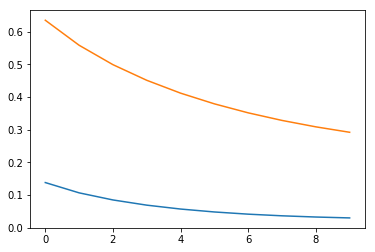

In [26]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])

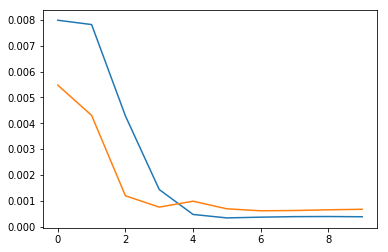

In [27]:
plt.plot(history_32.history['loss'])
plt.plot(history_32.history['val_loss'])

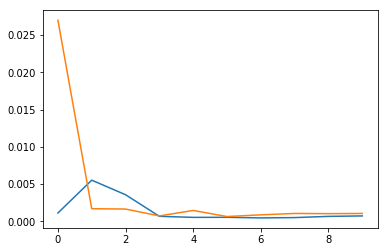

In [29]:
plt.plot(history_256.history['loss'])
plt.plot(history_256.history['val_loss'])

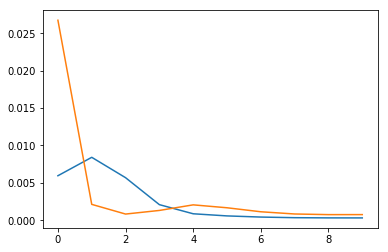

In [30]:
plt.plot(history_32_16.history['loss'])
plt.plot(history_32_16.history['val_loss'])

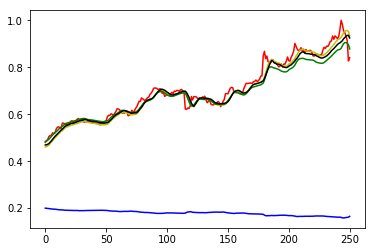

In [31]:
Xt_1 = model_1.predict(X_test)
Xt_32 = model_32.predict(X_test)
Xt_256 = model_256.predict(X_test)
Xt_32_16 = model_32_16.predict(X_test)


plt.plot(y_test.reshape(-1,1), color="r")
plt.plot(Xt_1, color="b")
plt.plot(Xt_32, color="y")
plt.plot(Xt_256, color="g")
plt.plot(Xt_32_16, color="k")

In [32]:
act = []
pred = []
#for i in range(250):
i=200
Xt_1 = model_1.predict(X_test[i].reshape(1,7,1))
Xt_32 = model_32.predict(X_test[i].reshape(1,7,1))
Xt_256 = model_256.predict(X_test[i].reshape(1,7,1))
Xt_32_16 = model_32_16.predict(X_test[i].reshape(1,7,1))


print('predicted:{0}, actual:{1}'.format(Xt_1,y_test[i].reshape(-1,1)))
print('predicted:{0}, actual:{1}'.format(Xt_32,y_test[i].reshape(-1,1)))
print('predicted:{0}, actual:{1}'.format(Xt_256,y_test[i].reshape(-1,1)))
print('predicted:{0}, actual:{1}'.format(Xt_32_16,y_test[i].reshape(-1,1)))

pred.append(scl.inverse_transform(Xt_1))
pred.append(scl.inverse_transform(Xt_32))
pred.append(scl.inverse_transform(Xt_256))
pred.append(scl.inverse_transform(Xt_32_16))
act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[0.16813111]], actual:[[0.82757522]]
predicted:[[0.81287104]], actual:[[0.82757522]]
predicted:[[0.7887875]], actual:[[0.82757522]]
predicted:[[0.8043154]], actual:[[0.82757522]]


In [33]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

ValueError: arrays must all be same length